In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [8]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://machinelearningmastery.com/curve-fitting-with-python/

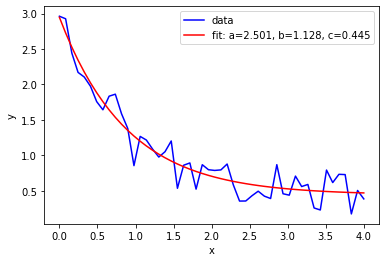

In [7]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## distribution -> histogram -> fit

In [10]:
x_arr = np.random.lognormal(size=10000)

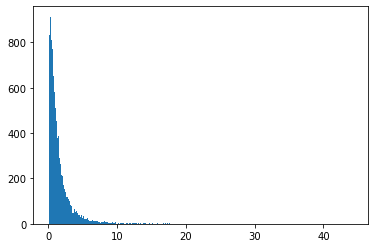

In [11]:
bin_values, bin_bounds, _ = plt.hist(x_arr, 'auto')

In [15]:
bin_center_offset = (bin_bounds[1] - bin_bounds[0])*0.5

In [17]:
bin_centers = bin_bounds[:-1] + bin_center_offset

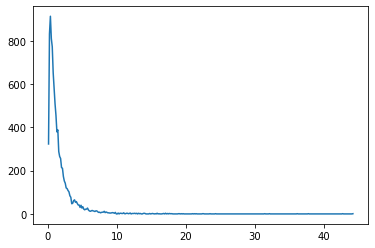

In [18]:
plt.plot(bin_centers, bin_values)

In [20]:
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def power_decay(x, a, b, c):
    return a * np.power(x, -b) + c

In [21]:
len(bin_centers)

329

/var/folders/6p/9bzctf_57kx_d_37w01kwznh0000gn/T/ipykernel_71951/1406098488.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/var/folders/6p/9bzctf_57kx_d_37w01kwznh0000gn/T/ipykernel_71951/1406098488.py:2: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


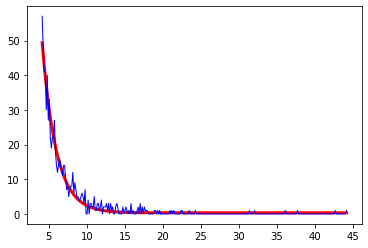

In [41]:
popt, pcov = curve_fit(exponential_decay, bin_centers[30:], bin_values[30:])
plt.plot(bin_centers[30:], exponential_decay(bin_centers[30:], *popt), lw=3, color='r')
plt.plot(bin_centers[30:], bin_values[30:], lw=1, color='b')

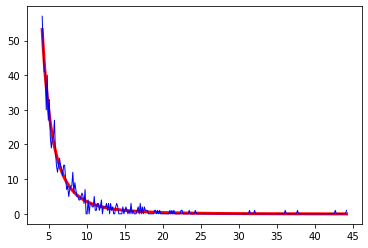

In [38]:
popt, pcov = curve_fit(power_decay, bin_centers[30:], bin_values[30:])
plt.plot(bin_centers[30:], power_decay(bin_centers[30:], *popt), lw=3, color='r')
plt.plot(bin_centers[30:], bin_values[30:], lw=1, color='b')